# Results obtained with Return metric as reward

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from Utils_2 import *
from linUCB_1 import *
import seaborn as sns

In [2]:
dataExt3 = pd.read_csv('DataExtra/game3.csv')
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

dataExt2 = pd.read_csv('DataExtra/game1.csv')
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1

In [3]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big2 = dataExt2[Features_ALL].copy()
data_big3 = dataExt3[Features_ALL].copy()
print("\nDataExtra3 different A/B tests counts:")
print(data_big3.ab_test_id.value_counts())
print("\nDataExtra2 different A/B tests counts:")
print(data_big2.ab_test_id.value_counts())


DataExtra3 different A/B tests counts:
3350    1381702
3301     776402
3331     717633
3292     706119
3346     655856
3307     413295
Name: ab_test_id, dtype: int64

DataExtra2 different A/B tests counts:
3495    486295
3552    458911
3582    301515
3473    285731
3457    247844
3454    245962
3565    225935
3420    184148
3507    163803
3526    159849
Name: ab_test_id, dtype: int64


In [4]:
Test_ID_big = 3301
Test_ID_big2 = 3582
NGU = 1
DataDef = data_big3[(data_big3.ab_test_id == Test_ID_big) & (data_big3.NGU == NGU)]
DataDef2 = data_big2[(data_big2.ab_test_id == Test_ID_big2) & (data_big2.NGU == NGU)]
print("2 Arms data shape:", DataDef.shape)
print("4 Arms data shape:", DataDef2.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
DataDef_cat = CreateDummies(DataDef, Features_Dummie)
DataDef_cat2 = CreateDummies(DataDef2, Features_Dummie)

2 Arms data shape: (743103, 30)
4 Arms data shape: (289806, 30)


In [5]:
Actual_Dataset = DataDef_cat.sample(n=20000, random_state=35)
Actual_Dataset2 = DataDef_cat2.sample(n=50000, random_state=13)

### 2 Arms experiment

#### Day 1

In [8]:
Reward = "return_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 8

Results1, Paths_Best1, Aligns_Best1, Mean_Reward_Best1, Mean_RewardArms_Best1, Mark_Best1, Feat_Best1, Times_ArmChosen1 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.44905
Parameters for following model:
	Reward: return_d1
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 0.5


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1088.97it/s]


	Algorithm result is: 0.44991426190289174
	Score to beat is: 0.44905
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 1


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1083.86it/s]


	Algorithm result is: 0.4461158058785004
	Score to beat is: 0.44905
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 1.5


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1089.44it/s]


	Algorithm result is: 0.44939434253024835
	Score to beat is: 0.44905
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 2


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1079.33it/s]


	Algorithm result is: 0.4459088302318256
	Score to beat is: 0.44905
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 2.3581015157406195


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1080.46it/s]


	Algorithm result is: 0.44700572374899117
	Score to beat is: 0.44905
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 2.480207187300798


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1083.86it/s]


	Algorithm result is: 0.44515924022426556
	Score to beat is: 0.44905
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 3


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1079.08it/s]


	Algorithm result is: 0.4504727499987193
	Score to beat is: 0.44905
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 3.5


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1097.68it/s]

	Algorithm result is: 0.45003118997341707
	Score to beat is: 0.44905


In [55]:
Results1

[0.44991426190289174,
 0.4461158058785004,
 0.44939434253024835,
 0.4459088302318256,
 0.44700572374899117,
 0.44515924022426556,
 0.4504727499987193,
 0.45003118997341707]

In [9]:
print("Best alpha is:", Alphas[Results1.index(np.max(Results1))])
Alpha = Alphas[Results1.index(np.max(Results1))]

Best alpha is: 3


In [10]:
Mean_Reward_Best1

[0.4494626705424869,
 0.43970768109536806,
 0.44776237981045625,
 0.45834359568100475,
 0.45362474462357394,
 0.45073691992410925,
 0.44914307089903505,
 0.45500093741372005]

In [35]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

0.4457040572792363
0.4524336283185841


In [18]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1))

Score to beat: 0.44905
Algorithm score: 0.4504727499987193


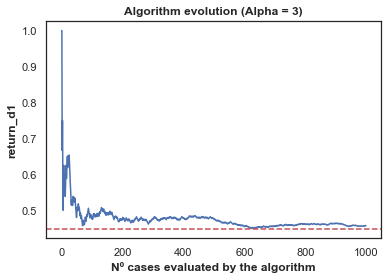

In [19]:
Plot_AlignRewards(Aligns_Best1, 3, Reward, Alpha, N = 1000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

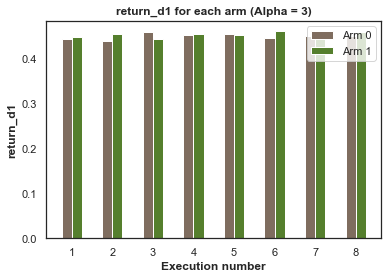

In [20]:
PerformanceArm2(Mean_RewardArms_Best1, Alpha, Reward)

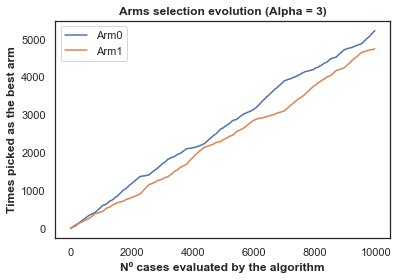

In [21]:
Plot_ArmsSelection(Paths_Best1, 0, Alpha)

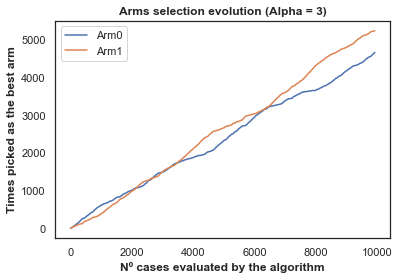

In [22]:
Plot_ArmsSelection(Paths_Best1, 3, Alpha)

Times each arm is chosen: [4887.375 5092.25 ]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 22.700106985744306
Proportion source_alias_source2 equals 0 for arm 1 is: 21.149031912926418


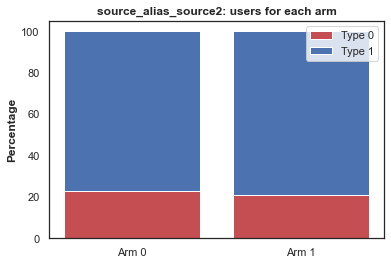

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 77.32949513991181
Proportion platform_alias_platform2 equals 0 for arm 1 is: 73.01070358274863


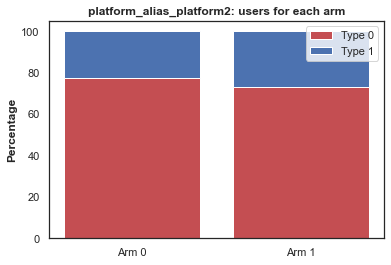

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.33326712 0.14158181 0.52515107]
Proportion country for arm 1 is: [0.2251296  0.16804371 0.60682669]


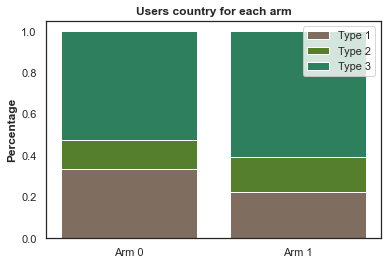

In [29]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best1, Feat_Best1)

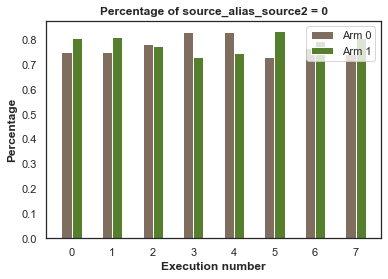

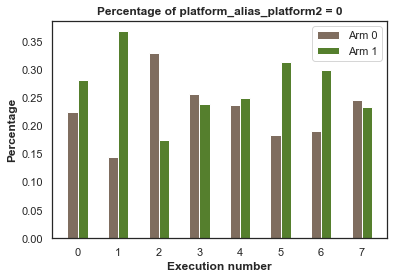

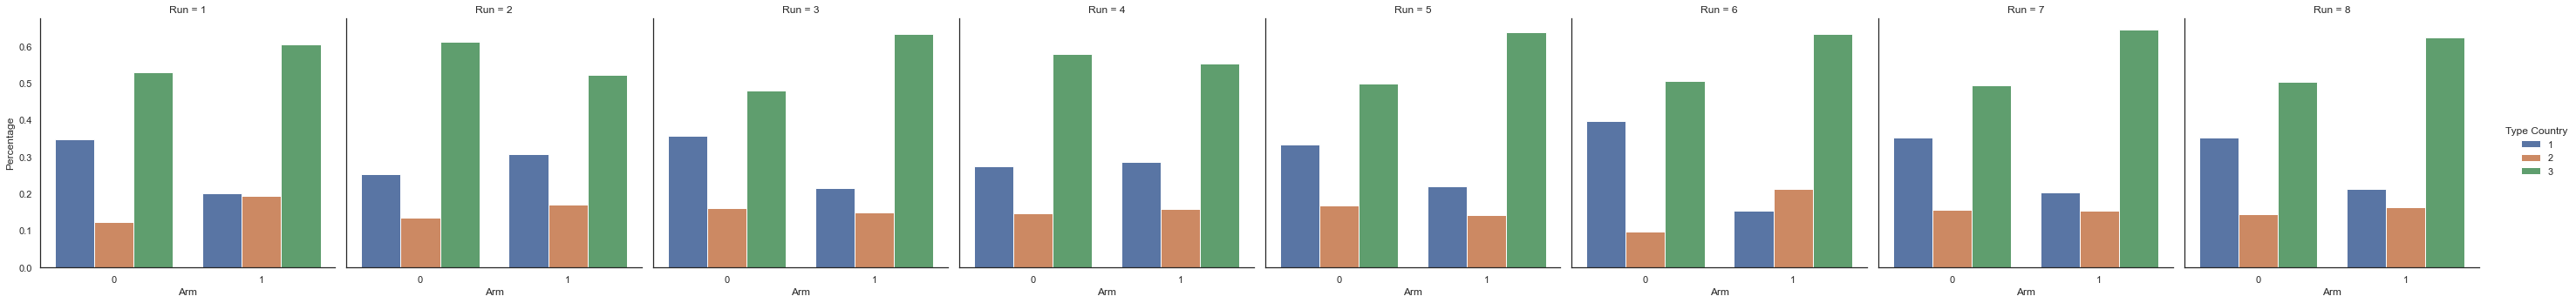

In [197]:
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "platform_alias_platform2")
Country_8Runs(Feat_Best1)

#### Day 3

In [30]:
Reward = "return_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 8

Results3, Paths_Best3, Aligns_Best3, Mean_Reward_Best3, Mean_RewardArms_Best3, Mark_Best3, Feat_Best3, Times_ArmChosen3 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.2652
Parameters for following model:
	Reward: return_d3
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 878.84it/s]


	Algorithm result is: 0.2639750817924002
	Score to beat is: 0.2652
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 879.86it/s]


	Algorithm result is: 0.25328103048607237
	Score to beat is: 0.2652
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:23<00:00, 869.33it/s]


	Algorithm result is: 0.25649428758339077
	Score to beat is: 0.2652
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:23<00:00, 865.67it/s]


	Algorithm result is: 0.25844123527160245
	Score to beat is: 0.2652
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 876.41it/s]


	Algorithm result is: 0.2535644354130764
	Score to beat is: 0.2652
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 897.03it/s]


	Algorithm result is: 0.2538362935852405
	Score to beat is: 0.2652
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:21<00:00, 942.42it/s]


	Algorithm result is: 0.24964473075089774
	Score to beat is: 0.2652
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 872.94it/s]

	Algorithm result is: 0.25242016661205446
	Score to beat is: 0.2652


In [37]:
Results3

[0.2639750817924002,
 0.25328103048607237,
 0.25649428758339077,
 0.25844123527160245,
 0.2535644354130764,
 0.2538362935852405,
 0.24964473075089774,
 0.25242016661205446]

In [38]:
print("Best alpha is:", Alphas[Results3.index(np.max(Results3))])
Alpha = Alphas[Results3.index(np.max(Results3))]

Best alpha is: 0.5


In [39]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

0.26203261734287986
0.2684030571198713


In [40]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3))

Score to beat: 0.2652
Algorithm score: 0.2639750817924002


In [41]:
Mean_Reward_Best3

[0.26130425142572394,
 0.2630912048474765,
 0.25164312851905385,
 0.2678722217941694,
 0.2734557199365375,
 0.26763501658752503,
 0.2599777651694211,
 0.26682134605929425]

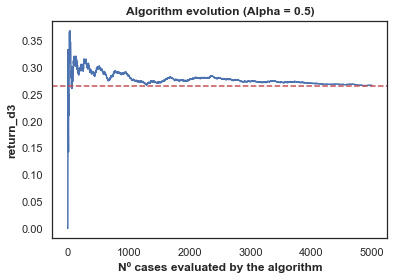

In [43]:
Plot_AlignRewards(Aligns_Best3, 4, Reward, Alpha, N = 5000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

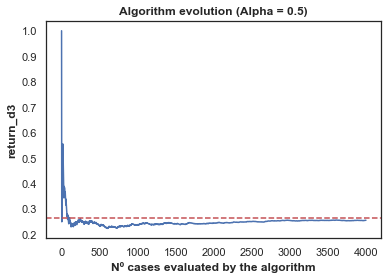

In [47]:
Plot_AlignRewards(Aligns_Best3, 2, Reward, Alpha, N = 4000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

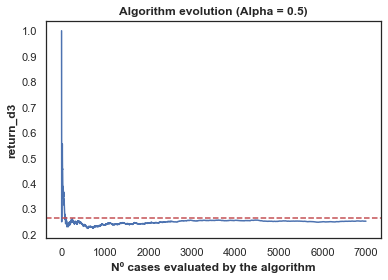

In [46]:
Plot_AlignRewards(Aligns_Best3, 2, Reward, Alpha, N = 7000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

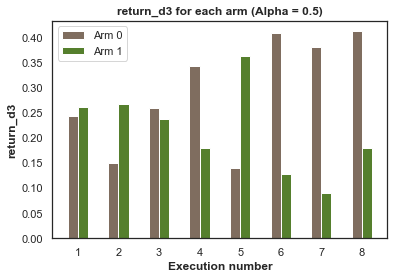

In [48]:
PerformanceArm2(Mean_RewardArms_Best3, Alpha, Reward)

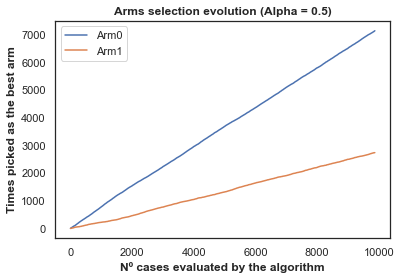

In [50]:
Plot_ArmsSelection(Paths_Best3, 2, Alpha)

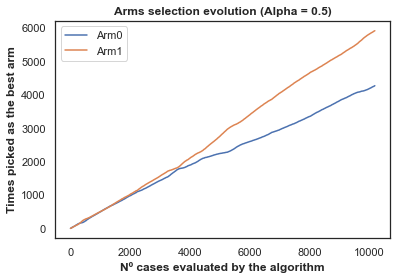

In [51]:
Plot_ArmsSelection(Paths_Best3, 4, Alpha)

Times each arm is chosen: [4145.5  5699.25]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 14.909707342999972
Proportion source_alias_source2 equals 0 for arm 1 is: 29.039728710190495


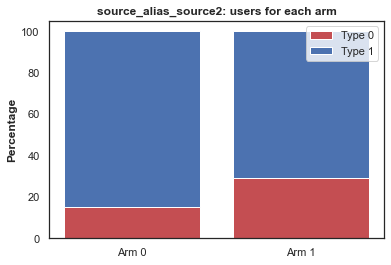

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 68.49822961545394
Proportion platform_alias_platform2 equals 0 for arm 1 is: 77.38113637511539


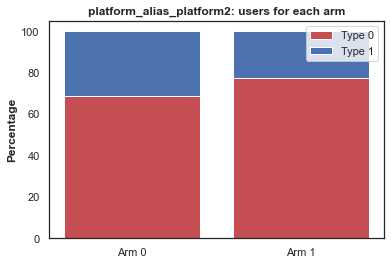

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.35684677 0.11474777 0.52840545]
Proportion country for arm 1 is: [0.26778209 0.20907693 0.52314098]


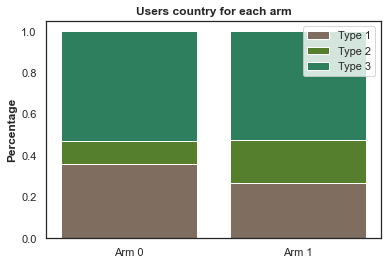

In [52]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3, Feat_Best3)

In [53]:
printFeatures2(Mark_Best3, Feat_Best3, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 64.315322821147
Proportion country_alias_country_group1 equals 0 for arm 1 is: 73.22179076389249

Proportion country_alias_country_group2 equals 0 for arm 0 is: 88.52522267614683
Proportion country_alias_country_group2 equals 0 for arm 1 is: 79.09230735513277

Proportion country_alias_country_group3 equals 0 for arm 0 is: 47.15945450270619
Proportion country_alias_country_group3 equals 0 for arm 1 is: 47.68590188097474

Proportion platform_alias_platform2 equals 0 for arm 0 is: 68.49822961545394
Proportion platform_alias_platform2 equals 0 for arm 1 is: 77.38113637511539

Proportion source_alias_source2 equals 0 for arm 0 is: 14.909707342999972
Proportion source_alias_source2 equals 0 for arm 1 is: 29.039728710190495

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 48.608940047921266
Proportion return_d1 equals 0 for arm 1 is: 66.4907415553

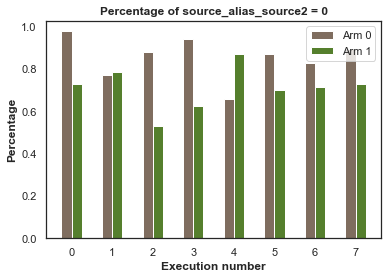

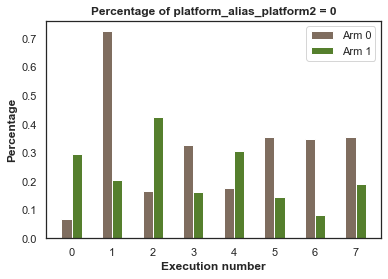

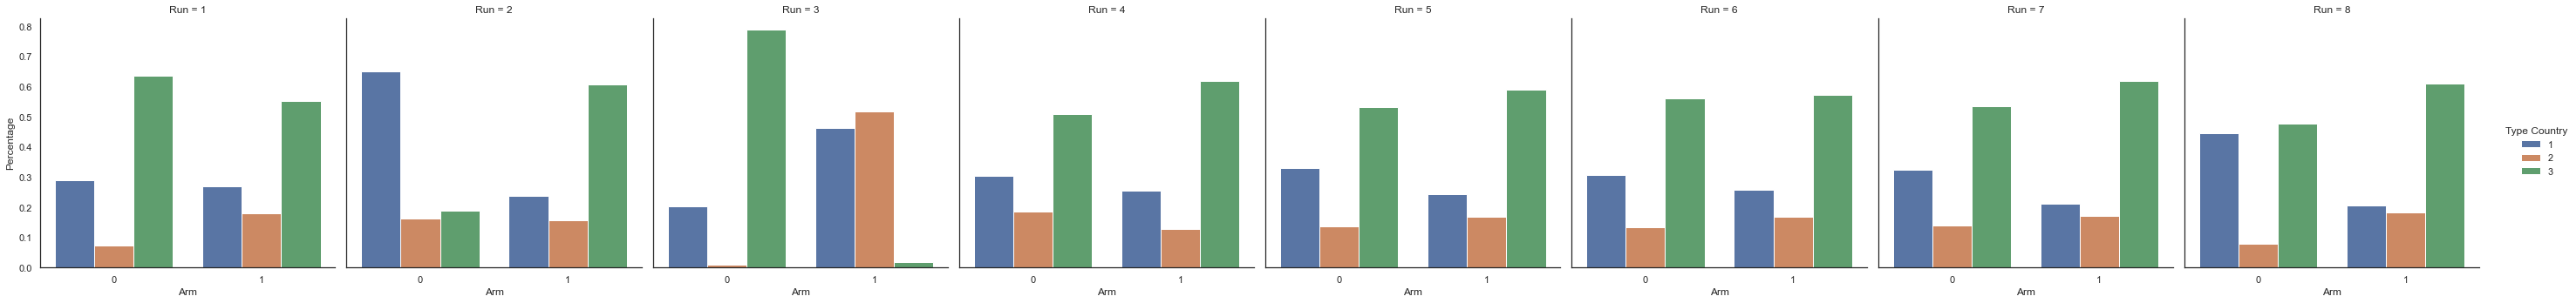

In [196]:
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "platform_alias_platform2")
Country_8Runs(Feat_Best3)

#### Day 7

In [6]:
Reward = "return_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 8

Results7, Paths_Best7, Aligns_Best7, Mean_Reward_Best7, Mean_RewardArms_Best7, Mark_Best7, Feat_Best7, Times_ArmChosen7 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.17385
Parameters for following model:
	Reward: return_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:30<00:00, 654.67it/s]


	Algorithm result is: 0.16669441070163826
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 639.86it/s]


	Algorithm result is: 0.16282403611128232
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 627.86it/s]


	Algorithm result is: 0.15604403420456853
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:30<00:00, 659.59it/s]


	Algorithm result is: 0.15452657337756764
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:30<00:00, 657.05it/s]


	Algorithm result is: 0.15764853824533773
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:30<00:00, 654.60it/s]


	Algorithm result is: 0.15845170586849783
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:28<00:00, 691.55it/s]


	Algorithm result is: 0.15438417817006506
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:29<00:00, 688.36it/s]

	Algorithm result is: 0.15424919738281437
	Score to beat is: 0.17385


In [7]:
Results7

[0.16669441070163826,
 0.16282403611128232,
 0.15604403420456853,
 0.15452657337756764,
 0.15764853824533773,
 0.15845170586849783,
 0.15438417817006506,
 0.15424919738281437]

In [8]:
print("Best alpha is:", Alphas[Results7.index(np.max(Results7))])
Alpha = Alphas[Results7.index(np.max(Results7))]

Best alpha is: 0.5


In [9]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

0.17104216388225935
0.17668946098149638


In [10]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7))

Score to beat: 0.17385
Algorithm score: 0.16669441070163826


In [11]:
Mean_Reward_Best7

[0.17027098220855205,
 0.16906824591202432,
 0.16795901451804446,
 0.15972422419037305,
 0.16678735977275091,
 0.16326454323791395,
 0.16705511089372982,
 0.1694258048797174]

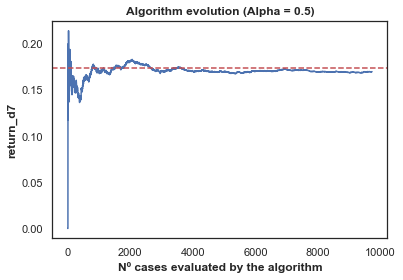

In [14]:
Plot_AlignRewards(Aligns_Best7, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

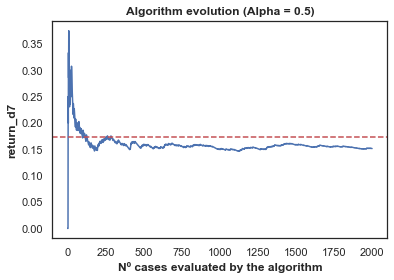

In [15]:
Plot_AlignRewards(Aligns_Best7, 3, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

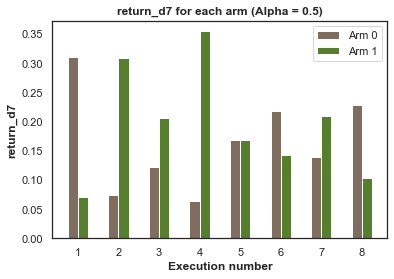

In [16]:
PerformanceArm2(Mean_RewardArms_Best7, Alpha, Reward)

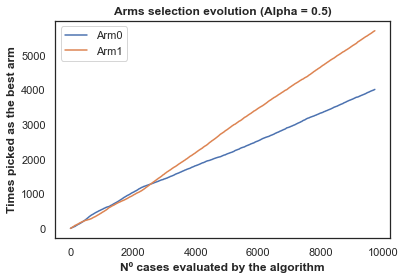

In [17]:
Plot_ArmsSelection(Paths_Best7, 0, Alpha)

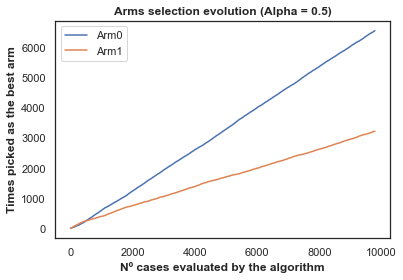

In [18]:
Plot_ArmsSelection(Paths_Best7, 3, Alpha)

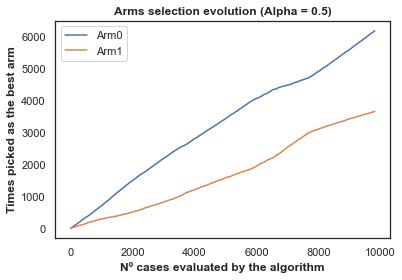

In [19]:
Plot_ArmsSelection(Paths_Best7, 4, Alpha)

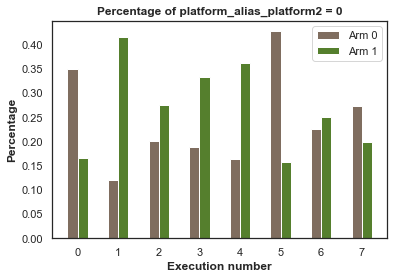

In [20]:
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "platform_alias_platform2")

Times each arm is chosen: [5208.375 4537.125]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 20.454282791387936
Proportion source_alias_source2 equals 0 for arm 1 is: 24.098110933064454


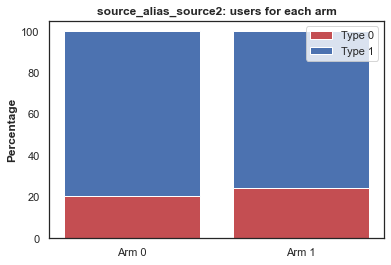

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.65557969313748
Proportion platform_alias_platform2 equals 0 for arm 1 is: 73.01266497548562


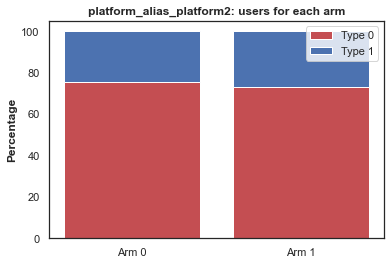

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.24207626 0.20049131 0.55743243]
Proportion country for arm 1 is: [0.31881807 0.12125941 0.55992252]


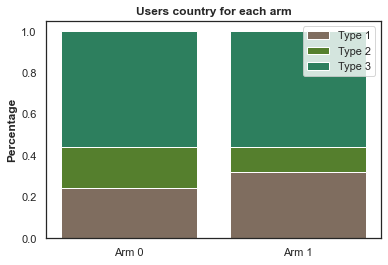

In [21]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7, Feat_Best7)

In [22]:
printFeatures2(Mark_Best7, Feat_Best7, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 75.79237401447949
Proportion country_alias_country_group1 equals 0 for arm 1 is: 68.11819333251579

Proportion country_alias_country_group2 equals 0 for arm 0 is: 79.95086898168597
Proportion country_alias_country_group2 equals 0 for arm 1 is: 87.87405909339745

Proportion country_alias_country_group3 equals 0 for arm 0 is: 44.25675700383454
Proportion country_alias_country_group3 equals 0 for arm 1 is: 44.00774757408675

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.65557969313748
Proportion platform_alias_platform2 equals 0 for arm 1 is: 73.01266497548562

Proportion source_alias_source2 equals 0 for arm 0 is: 20.454282791387936
Proportion source_alias_source2 equals 0 for arm 1 is: 24.098110933064454

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 56.91448720385861
Proportion return_d1 equals 0 for arm 1 is: 49.358776739

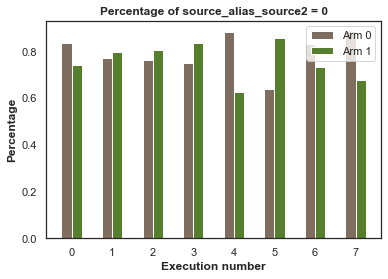

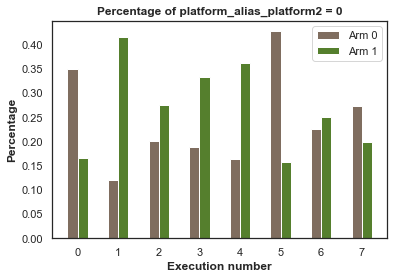

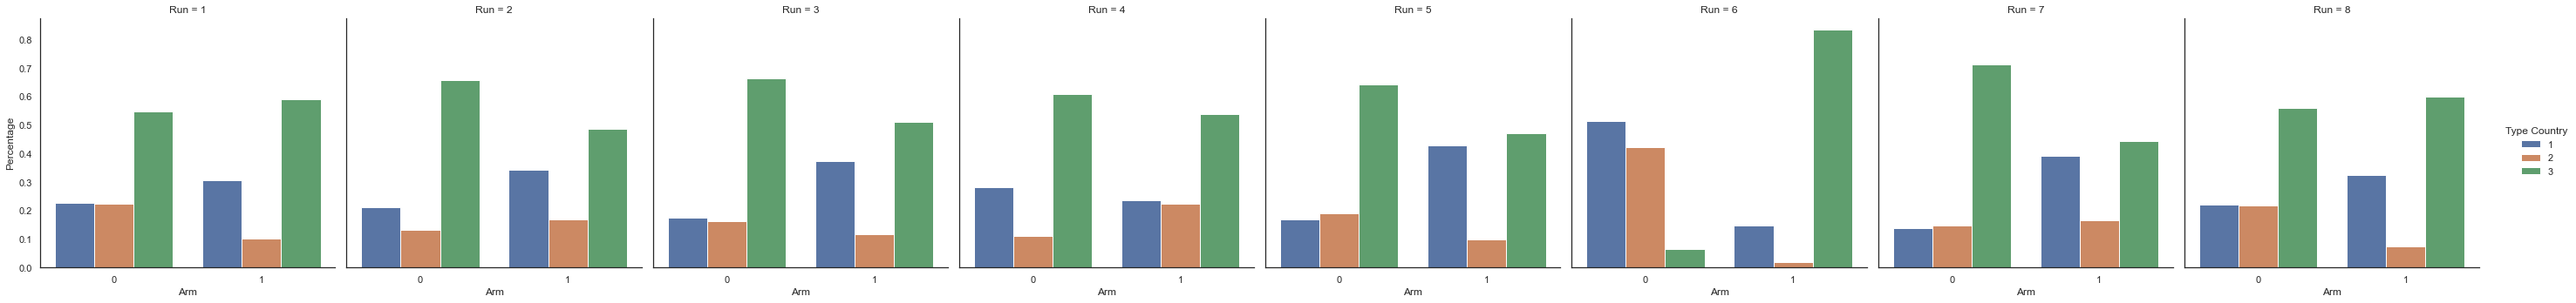

In [23]:
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "platform_alias_platform2")
Country_8Runs(Feat_Best7)

#### Removing features

In [24]:
Reward = "return_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_aux1, Paths_Best7_aux1, Aligns_Best7_aux1, Mean_Reward_Best7_aux1, Mean_RewardArms_Best7_aux1, Mark_Best7_aux1, Feat_Best7_aux1, Times_ArmChosen7_aux1 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.17385
Parameters for following model:
	Reward: return_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 879.06it/s]


	Algorithm result is: 0.16675031837520166
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 887.51it/s]


	Algorithm result is: 0.1628202703794412
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 886.29it/s]


	Algorithm result is: 0.1674000659896488
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 876.85it/s]


	Algorithm result is: 0.1657904778481957
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 873.37it/s]


	Algorithm result is: 0.1596831850703136
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 872.78it/s]


	Algorithm result is: 0.16410450244018499
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 880.06it/s]


	Algorithm result is: 0.16083040466502574
	Score to beat is: 0.17385
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 878.60it/s]

	Algorithm result is: 0.1662791801742668
	Score to beat is: 0.17385


In [25]:
Results7_aux1

[0.16675031837520166,
 0.1628202703794412,
 0.1674000659896488,
 0.1657904778481957,
 0.1596831850703136,
 0.16410450244018499,
 0.16083040466502574,
 0.1662791801742668]

In [26]:
print("Best alpha is:", Alphas[Results7_aux1.index(np.max(Results7_aux1))])
Alpha = Alphas[Results7_aux1.index(np.max(Results7_aux1))]

Best alpha is: 1.5


In [27]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

0.17104216388225935
0.17668946098149638


In [28]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_aux1))

Score to beat: 0.17385
Algorithm score: 0.1674000659896488


In [29]:
Mean_Reward_Best7_aux1

[0.17603009219310908,
 0.17198948309689024,
 0.1580449236918572,
 0.17399200490742386,
 0.15694382605896368]

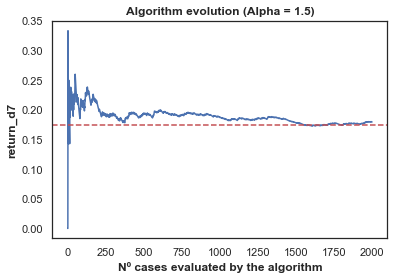

In [30]:
Plot_AlignRewards(Aligns_Best7_aux1, 0, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

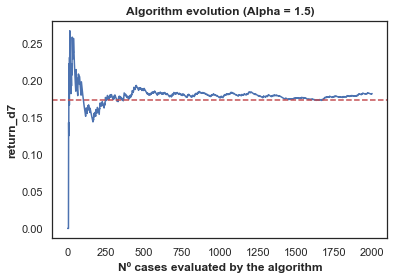

In [31]:
Plot_AlignRewards(Aligns_Best7_aux1, 3, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

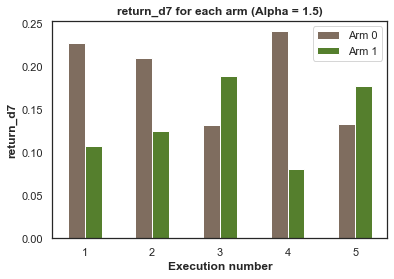

In [32]:
PerformanceArm2(Mean_RewardArms_Best7_aux1, Alpha, Reward)

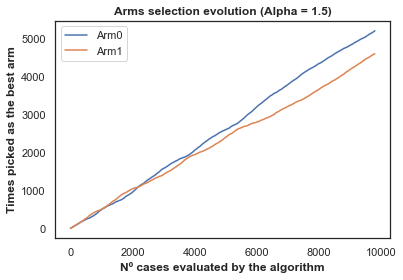

In [33]:
Plot_ArmsSelection(Paths_Best7_aux1, 0, Alpha)

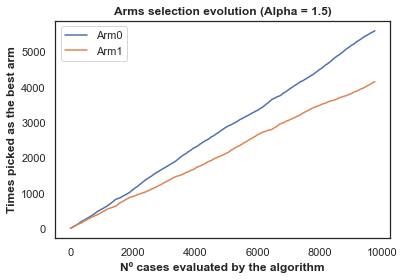

In [34]:
Plot_ArmsSelection(Paths_Best7_aux1, 3, Alpha)

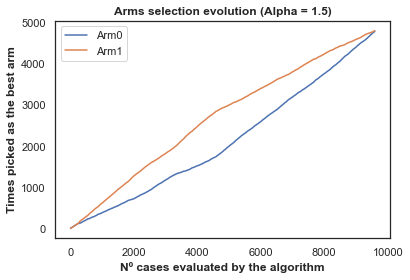

In [35]:
Plot_ArmsSelection(Paths_Best7_aux1, 4, Alpha)

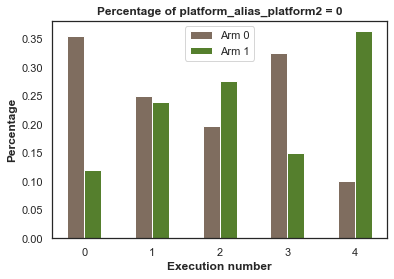

In [36]:
PlotFeaturesArm_2(Feat_Best7_aux1, Alpha, Reward = "platform_alias_platform2")

Times each arm is chosen: [5087.4 4606. ]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 20.060520551357342
Proportion source_alias_source2 equals 0 for arm 1 is: 24.80614327283428


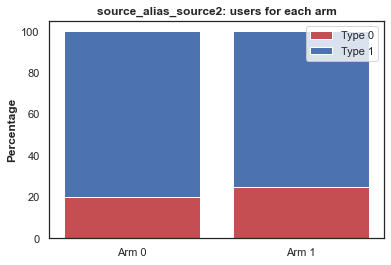

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.44432651656423
Proportion platform_alias_platform2 equals 0 for arm 1 is: 77.03202728124776


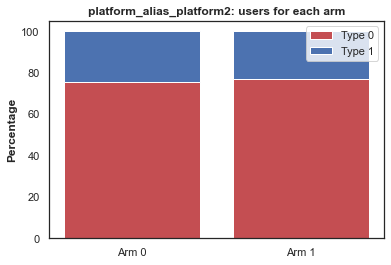

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.18021996 0.18659622 0.63318381]
Proportion country for arm 1 is: [0.36521802 0.11473358 0.5200484 ]


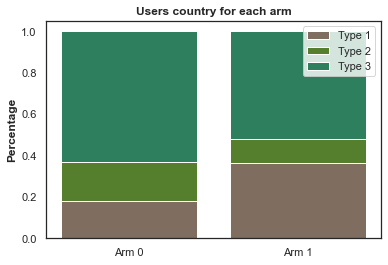

In [37]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_aux1, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_aux1, Feat_Best7_aux1)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_aux1, Feat_Best7_aux1)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_aux1, Feat_Best7_aux1)

In [38]:
printFeatures2(Mark_Best7_aux1, Feat_Best7_aux1, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 81.97800366184443
Proportion country_alias_country_group1 equals 0 for arm 1 is: 63.478198051071175

Proportion country_alias_country_group2 equals 0 for arm 0 is: 81.34037762931239
Proportion country_alias_country_group2 equals 0 for arm 1 is: 88.52664190657838

Proportion country_alias_country_group3 equals 0 for arm 0 is: 36.681618708843175
Proportion country_alias_country_group3 equals 0 for arm 1 is: 47.99516004235045

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.44432651656423
Proportion platform_alias_platform2 equals 0 for arm 1 is: 77.03202728124776

Proportion source_alias_source2 equals 0 for arm 0 is: 20.060520551357342
Proportion source_alias_source2 equals 0 for arm 1 is: 24.80614327283428

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 48.09405307110758
Proportion return_d1 equals 0 for arm 1 is: 66.89490894

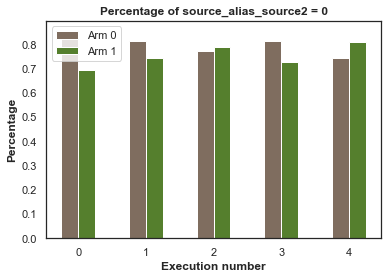

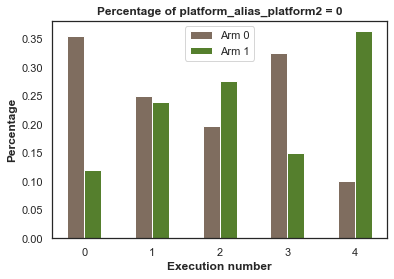

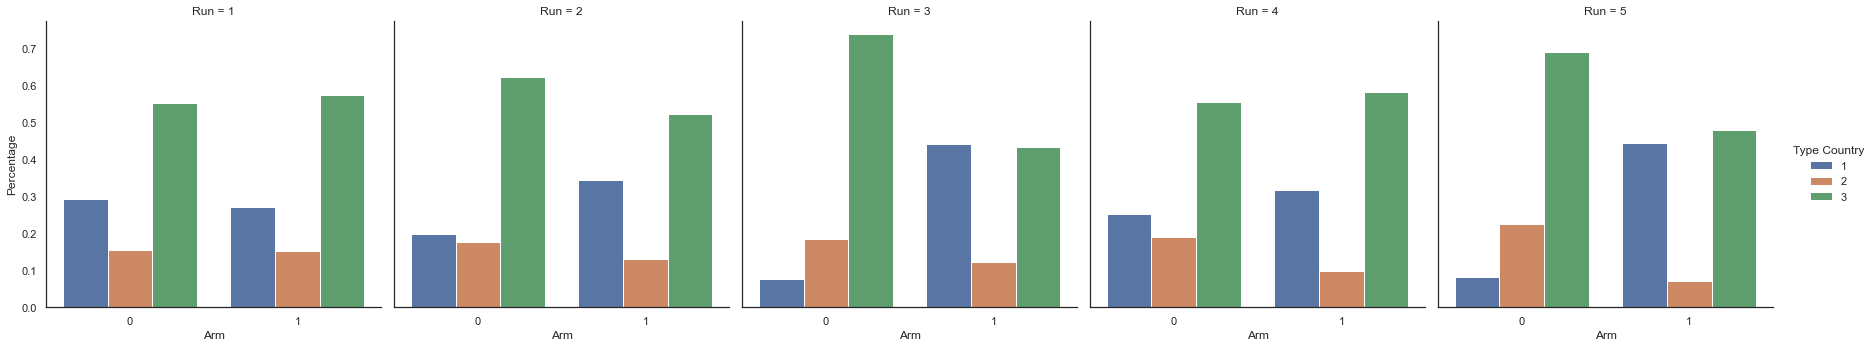

In [39]:
PlotFeaturesArm_2(Feat_Best7_aux1, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7_aux1, Alpha, Reward = "platform_alias_platform2")
Country_5Runs(Feat_Best7_aux1)

### 4 Arms experiments

#### Day 1

In [87]:
Reward = "return_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results1_4, Paths_Best1_4, Aligns_Best1_4, Mean_Reward_Best1_4, Mean_RewardArms_Best1_4, Mark_Best1_4, Feat_Best1_4, Times_ArmChosen1_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.27614
Parameters for following model:
	Reward: return_d1
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 0.5


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:42<00:00, 1170.89it/s]


	Algorithm result is: 0.2747556935577952
	Score to beat is: 0.27614
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 1


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:44<00:00, 1133.07it/s]


	Algorithm result is: 0.27658258294103616
	Score to beat is: 0.27614
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 1.5


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:42<00:00, 1187.71it/s]


	Algorithm result is: 0.27365463834628245
	Score to beat is: 0.27614
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 2


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:42<00:00, 1176.40it/s]


	Algorithm result is: 0.2776200225138482
	Score to beat is: 0.27614
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 2.3581015157406195


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:42<00:00, 1178.50it/s]


	Algorithm result is: 0.2735208462052774
	Score to beat is: 0.27614
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 2.480207187300798


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:43<00:00, 1155.00it/s]


	Algorithm result is: 0.27499146422828713
	Score to beat is: 0.27614
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 3


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:42<00:00, 1171.41it/s]


	Algorithm result is: 0.2745266312493079
	Score to beat is: 0.27614
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 3.5


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:42<00:00, 1175.10it/s]

	Algorithm result is: 0.2781794294173282
	Score to beat is: 0.27614


In [91]:
Alphas = [3.75, 4]
Results1_4_aux, Paths_Best1_4_aux, Aligns_Best1_4_aux, Mean_Reward_Best1_4_aux, Mean_RewardArms_Best1_4_aux, Mark_Best1_4_aux, Feat_Best1_4_aux, Times_ArmChosen1_4_aux = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.27614
Parameters for following model:
	Reward: return_d1
	Number of Arms: 4
	Alphas:  [3.75, 4]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 3.75


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:44<00:00, 1126.53it/s]


	Algorithm result is: 0.27526799318377204
	Score to beat is: 0.27614
EVALUATION WITH DIFFERENT ALPHAS FOR return_d1 RUNNING
Alpha equals: 4


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:44<00:00, 1118.19it/s]

	Algorithm result is: 0.2714654106868651
	Score to beat is: 0.27614


In [96]:
Results1_4

[0.2747556935577952,
 0.27658258294103616,
 0.27365463834628245,
 0.2776200225138482,
 0.2735208462052774,
 0.27499146422828713,
 0.2745266312493079,
 0.2781794294173282]

In [97]:
Results1_4_aux

[0.27526799318377204, 0.2714654106868651]

In [98]:
print("Best alpha is:", Alphas[Results1_4.index(np.max(Results1_4))])
Alpha = Alphas[Results1_4.index(np.max(Results1_4))]

Best alpha is: 3.5


In [99]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.277724358974359
0.2780941686051175


In [100]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1_4))

Score to beat: 0.27614
Algorithm score: 0.2781794294173282


In [101]:
Mean_Reward_Best1_4

[0.2752735806427074,
 0.2761279384414232,
 0.272619401036856,
 0.28716234238105076,
 0.27971388458460344]

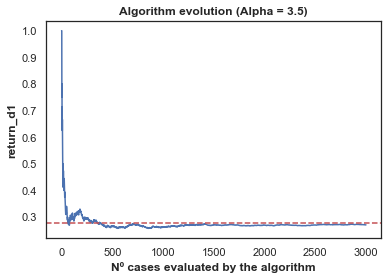

In [104]:
Plot_AlignRewards(Aligns_Best1_4, 2, Reward, Alpha, N = 3000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

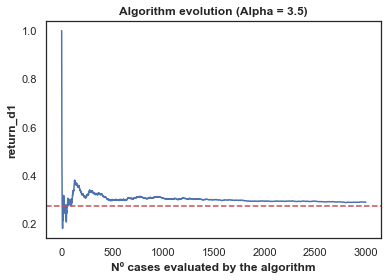

In [108]:
Plot_AlignRewards(Aligns_Best1_4, 3, Reward, Alpha, N = 3000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

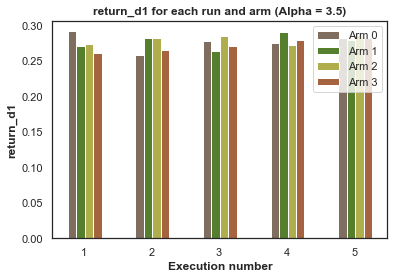

In [112]:
PerformanceArm4(Mean_RewardArms_Best1_4, Alpha, Reward)

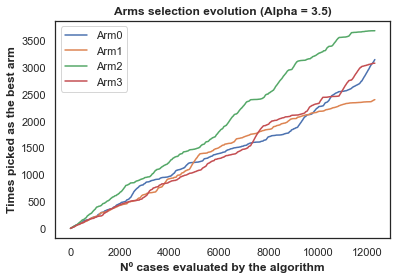

In [125]:
Plot_ArmsSelection(Paths_Best1_4, 2, Alpha)

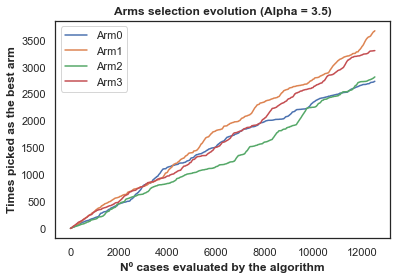

In [126]:
Plot_ArmsSelection(Paths_Best1_4, 3, Alpha)

In [10]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



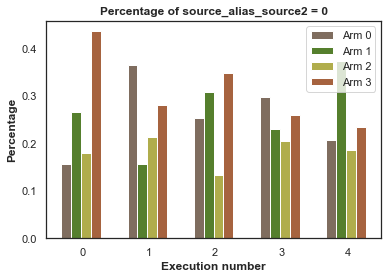

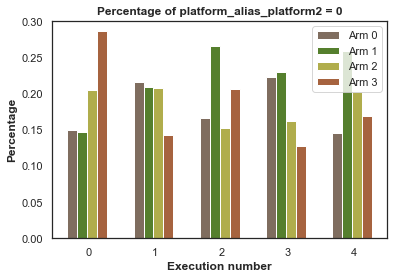

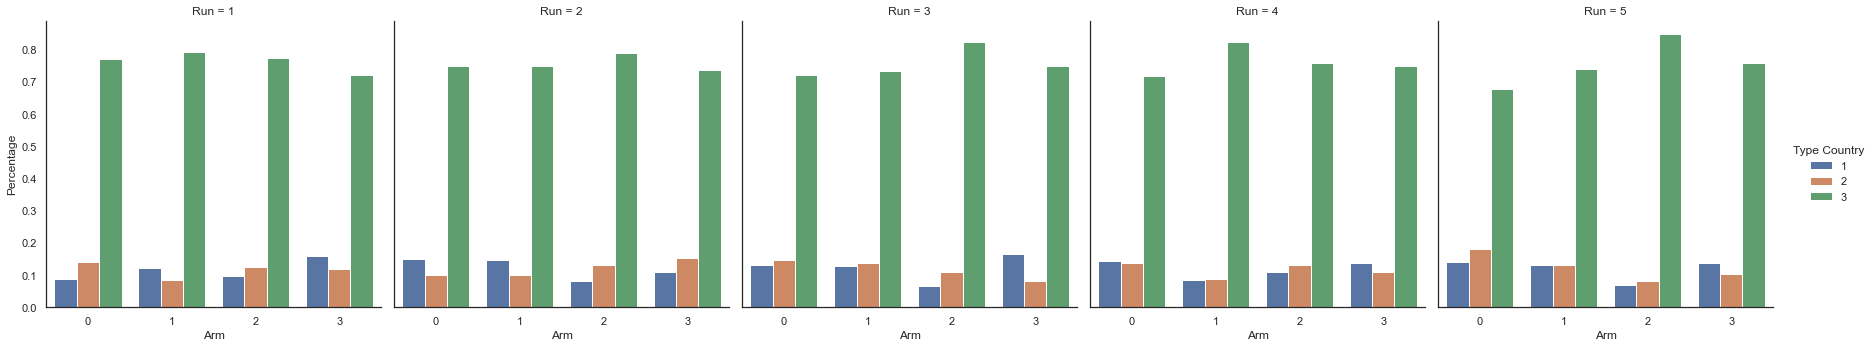

In [191]:
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "platform_alias_platform2")
PlotFeaturesArm_4_Country5Runs(Feat_Best1_4)

#### Day 3

In [128]:
Reward = "return_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results3_4, Paths_Best3_4, Aligns_Best3_4, Mean_Reward_Best3_4, Mean_RewardArms_Best3_4, Mark_Best3_4, Feat_Best3_4, Times_ArmChosen3_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.14172
Parameters for following model:
	Reward: return_d3
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:21<00:00, 614.55it/s]


	Algorithm result is: 0.1427036012550335
	Score to beat is: 0.14172
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:18<00:00, 637.75it/s]


	Algorithm result is: 0.14315411540082396
	Score to beat is: 0.14172
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:21<00:00, 614.14it/s]


	Algorithm result is: 0.1378845839746334
	Score to beat is: 0.14172
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:21<00:00, 609.89it/s]


	Algorithm result is: 0.14385219856824677
	Score to beat is: 0.14172
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:22<00:00, 604.13it/s]


	Algorithm result is: 0.13793498559905987
	Score to beat is: 0.14172
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:20<00:00, 617.90it/s]


	Algorithm result is: 0.14373043575276542
	Score to beat is: 0.14172
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:18<00:00, 634.81it/s]


	Algorithm result is: 0.13795057466109215
	Score to beat is: 0.14172
EVALUATION WITH DIFFERENT ALPHAS FOR return_d3 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:25<00:00, 584.28it/s]

	Algorithm result is: 0.1419494845512951
	Score to beat is: 0.14172


In [129]:
Results3_4

[0.1427036012550335,
 0.14315411540082396,
 0.1378845839746334,
 0.14385219856824677,
 0.13793498559905987,
 0.14373043575276542,
 0.13795057466109215,
 0.1419494845512951]

In [130]:
print("Best alpha is:", Alphas[Results3_4.index(np.max(Results3_4))])
Alpha = Alphas[Results3_4.index(np.max(Results3_4))]

Best alpha is: 2


In [131]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.13950320512820513
0.14526349562845914


In [132]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3_4))

Score to beat: 0.14172
Algorithm score: 0.14385219856824677


In [133]:
Mean_Reward_Best3_4

[0.1491930468257865,
 0.14328657924840346,
 0.13966924415894266,
 0.145684726470739,
 0.1414273961373621]

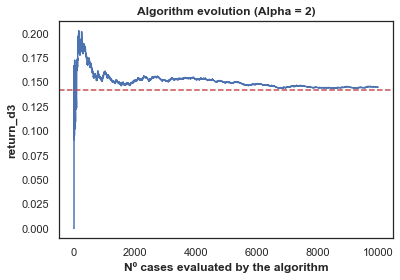

In [138]:
Plot_AlignRewards(Aligns_Best3_4, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

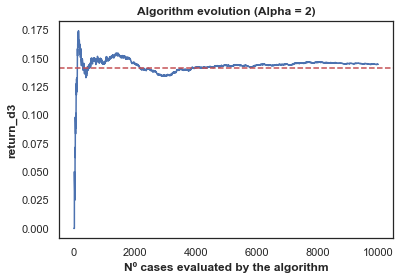

In [139]:
Plot_AlignRewards(Aligns_Best3_4, 1, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

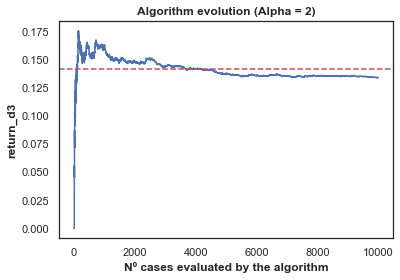

In [137]:
Plot_AlignRewards(Aligns_Best3_4, 2, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

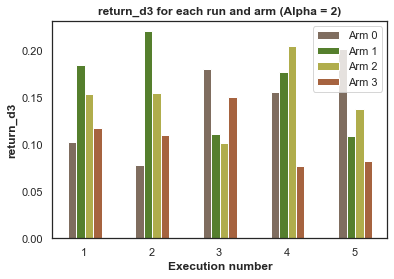

In [141]:
PerformanceArm4(Mean_RewardArms_Best3_4, Alpha, Reward)

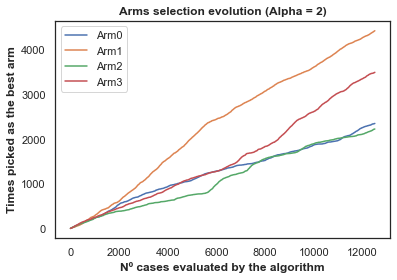

In [142]:
Plot_ArmsSelection(Paths_Best3_4, 0, Alpha)

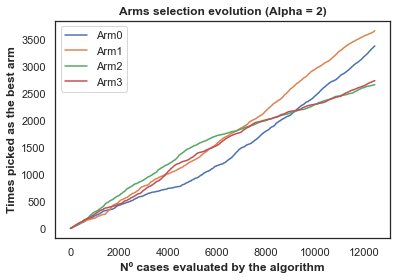

In [143]:
Plot_ArmsSelection(Paths_Best3_4, 1, Alpha)

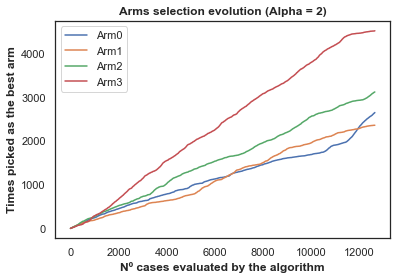

In [144]:
Plot_ArmsSelection(Paths_Best3_4, 2, Alpha)

In [9]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [3281.4 3214.2 2399.2 3616.2]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 79.53894614019325
Proportion source_alias_source2 equals 0 for arm 1 is: 78.13706928970888
Proportion source_alias_source2 equals 0 for arm 2 is: 65.04241278480667
Proportion source_alias_source2 equals 0 for arm 3 is: 73.00454418601927


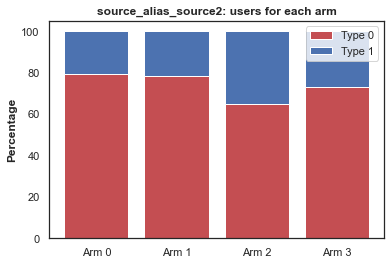

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 80.49683112327702
Proportion platform_alias_platform2 equals 0 for arm 1 is: 78.95988184432422
Proportion platform_alias_platform2 equals 0 for arm 2 is: 68.30705906876307
Proportion platform_alias_platform2 equals 0 for arm 3 is: 89.76962795874964


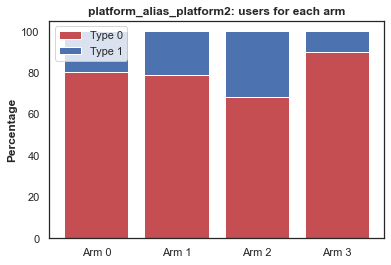

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.13080158 0.14701432 0.7221841 ]
Proportion country for arm 1 is: [0.12605161 0.15107443 0.72287396]
Proportion country for arm 2 is: [0.14133136 0.13706581 0.72160283]
Proportion country for arm 3 is: [0.09593888 0.07133875 0.83272237]


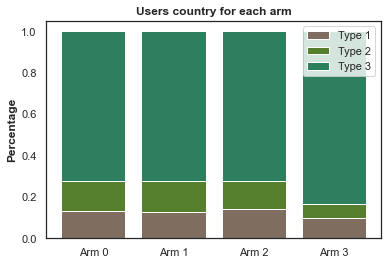

In [145]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3_4, Feat_Best3_4)

In [146]:
printFeatures2(Mark_Best7_4, Feat_Best7_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 80.49913393221654
Proportion country_alias_country_group1 equals 0 for arm 1 is: 64.05655940232232

Proportion country_alias_country_group2 equals 0 for arm 0 is: 81.56251943893216
Proportion country_alias_country_group2 equals 0 for arm 1 is: 87.51862648884554

Proportion country_alias_country_group3 equals 0 for arm 0 is: 37.938346628851306
Proportion country_alias_country_group3 equals 0 for arm 1 is: 48.42481410883215

Proportion platform_alias_platform2 equals 0 for arm 0 is: 79.76314133311463
Proportion platform_alias_platform2 equals 0 for arm 1 is: 69.96669384989079

Proportion source_alias_source2 equals 0 for arm 0 is: 20.7426043848152
Proportion source_alias_source2 equals 0 for arm 1 is: 23.171546717305137

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 58.00496375093076
Proportion return_d1 equals 0 for arm 1 is: 48.8950407491

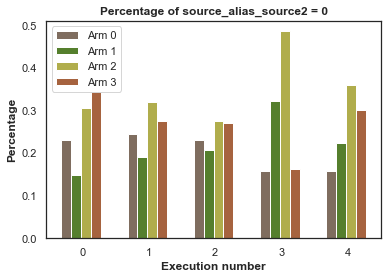

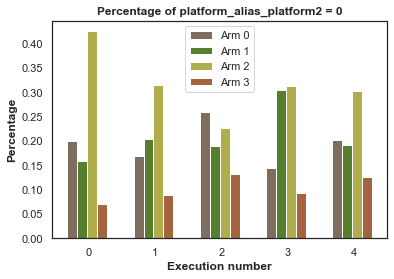

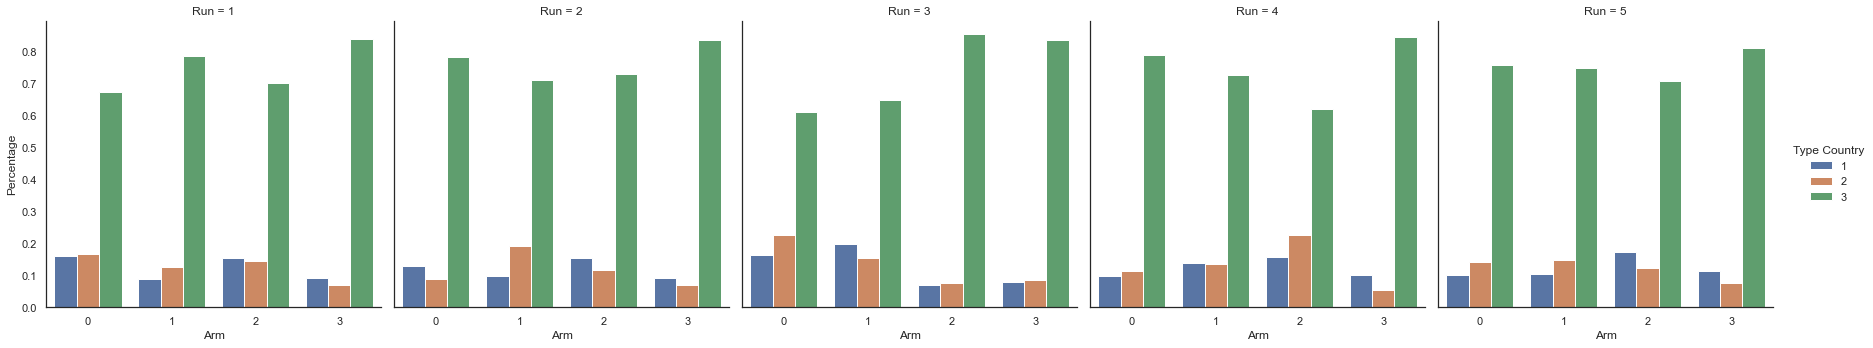

In [190]:
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "platform_alias_platform2")
PlotFeaturesArm_4_Country5Runs(Feat_Best3_4)

#### Day 7

In [147]:
Reward = "return_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_4, Paths_Best7_4, Aligns_Best7_4, Mean_Reward_Best7_4, Mean_RewardArms_Best7_4, Mark_Best7_4, Feat_Best7_4, Times_ArmChosen7_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.09122
Parameters for following model:
	Reward: return_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:08<00:00, 390.39it/s]


	Algorithm result is: 0.09186845732355797
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:02<00:00, 406.89it/s]


	Algorithm result is: 0.08806113212329889
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:02<00:00, 407.20it/s]


	Algorithm result is: 0.09118352951348303
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:03<00:00, 403.23it/s]


	Algorithm result is: 0.09195157389097838
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:02<00:00, 406.64it/s]


	Algorithm result is: 0.09033333863859172
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:59<00:00, 420.07it/s]


	Algorithm result is: 0.09034636591909019
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:59<00:00, 420.16it/s]


	Algorithm result is: 0.0908767044023329
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:47<00:00, 463.33it/s]

	Algorithm result is: 0.09013969824027727
	Score to beat is: 0.09122


In [148]:
Results7_4

[0.09186845732355797,
 0.08806113212329889,
 0.09118352951348303,
 0.09195157389097838,
 0.09033333863859172,
 0.09034636591909019,
 0.0908767044023329,
 0.09013969824027727]

In [149]:
print("Best alpha is:", Alphas[Results7_4.index(np.max(Results7_4))])
Alpha = Alphas[Results7_4.index(np.max(Results7_4))]

Best alpha is: 2


In [150]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.09190705128205129
0.09176225234619395


In [151]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4))

Score to beat: 0.09122
Algorithm score: 0.09195157389097838


In [152]:
Mean_Reward_Best7_4

[0.09063216563549267,
 0.08911424927917581,
 0.09233952761169832,
 0.09206199868963277,
 0.09560992823889229]

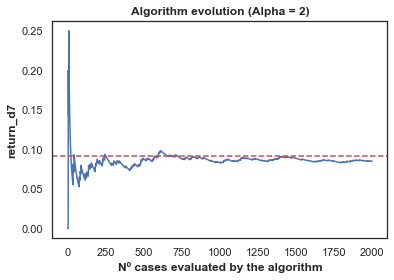

In [153]:
Plot_AlignRewards(Aligns_Best7_4, 0, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

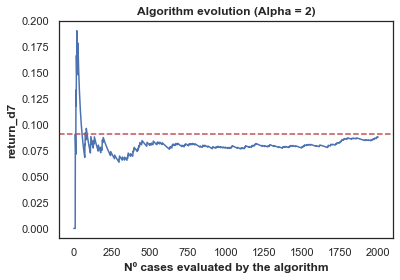

In [156]:
Plot_AlignRewards(Aligns_Best7_4, 1, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

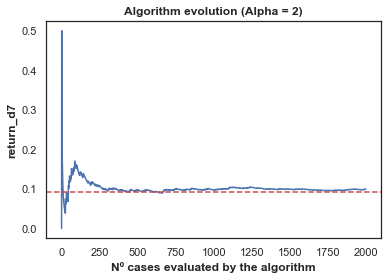

In [157]:
Plot_AlignRewards(Aligns_Best7_4, 4, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

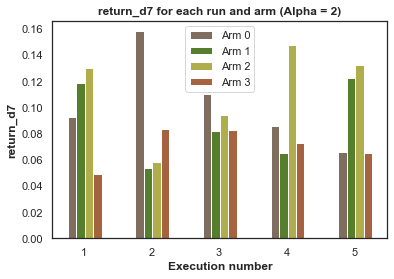

In [158]:
PerformanceArm4(Mean_RewardArms_Best7_4, Alpha, Reward)

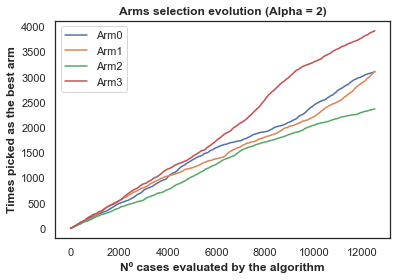

In [159]:
Plot_ArmsSelection(Paths_Best7_4, 0, Alpha)

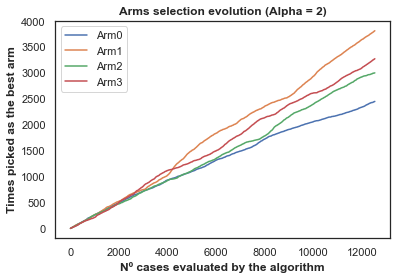

In [160]:
Plot_ArmsSelection(Paths_Best7_4, 2, Alpha)

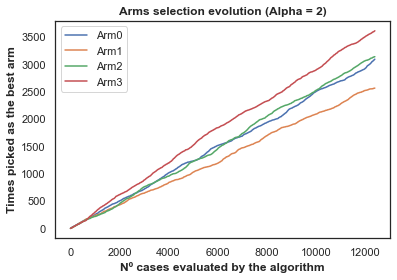

In [161]:
Plot_ArmsSelection(Paths_Best7_4, 4, Alpha)

In [8]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [2886.  3370.4 2824.6 3392.4]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 73.51371406672162
Proportion source_alias_source2 equals 0 for arm 1 is: 79.69266280778831
Proportion source_alias_source2 equals 0 for arm 2 is: 71.85469820228477
Proportion source_alias_source2 equals 0 for arm 3 is: 72.34291974343738


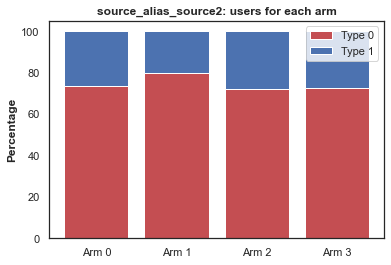

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 76.4418743203199
Proportion platform_alias_platform2 equals 0 for arm 1 is: 82.71636602456486
Proportion platform_alias_platform2 equals 0 for arm 2 is: 81.12785498069057
Proportion platform_alias_platform2 equals 0 for arm 3 is: 80.41725635119383


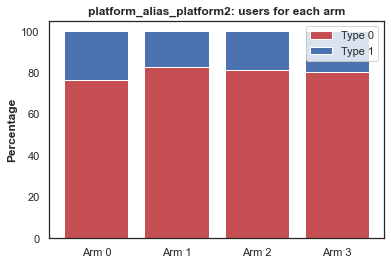

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.13534445 0.13694752 0.72770804]
Proportion country for arm 1 is: [0.10493899 0.13436201 0.760699  ]
Proportion country for arm 2 is: [0.11518901 0.13654314 0.74826784]
Proportion country for arm 3 is: [0.12314394 0.09138207 0.78547399]


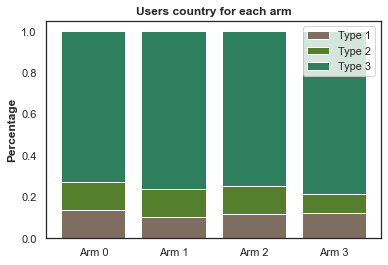

In [162]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4, Feat_Best7_4)

In [164]:
printFeatures2(Mark_Best7_4, Feat_Best7_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 86.46555548739819
Proportion country_alias_country_group1 equals 0 for arm 1 is: 89.50610140427816
Proportion country_alias_country_group1 equals 0 for arm 2 is: 88.48109889320892
Proportion country_alias_country_group1 equals 0 for arm 3 is: 87.68560571349273

Proportion country_alias_country_group2 equals 0 for arm 0 is: 86.30524806721908
Proportion country_alias_country_group2 equals 0 for arm 1 is: 86.56379866488857
Proportion country_alias_country_group2 equals 0 for arm 2 is: 86.34568556113852
Proportion country_alias_country_group2 equals 0 for arm 3 is: 90.86179295966888

Proportion country_alias_country_group3 equals 0 for arm 0 is: 27.22919644538272
Proportion country_alias_country_group3 equals 0 for arm 1 is: 23.930099930833297
Proportion country_alias_country_group3 equals 0 for arm 2 is: 25.17321554565254
Proportion country_alias_country_group3 equals 0 for arm 3 is: 21.452601326838376

Proportion platform_ali

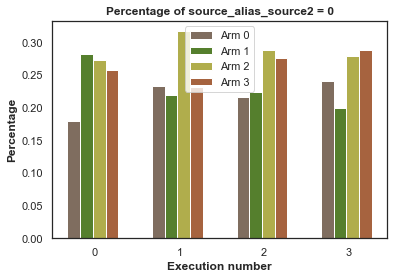

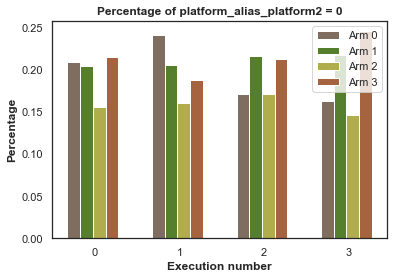

In [167]:
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "platform_alias_platform2")

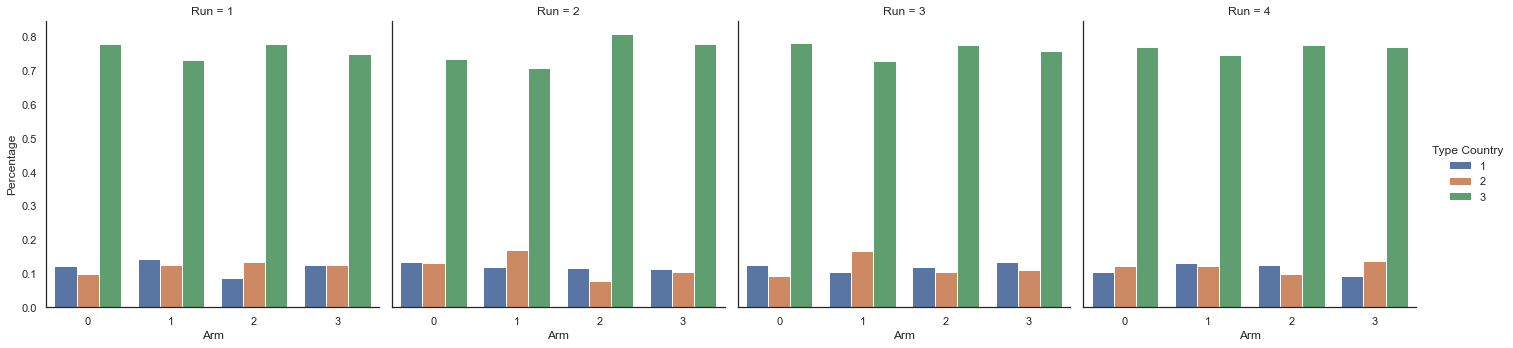

In [168]:
PlotFeaturesArm_4_Country4Runs(Feat_Best7_4)

#### Removing features

In [165]:
Reward = "return_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 4

Results7_4, Paths_Best7_4, Aligns_Best7_4, Mean_Reward_Best7_4, Mean_RewardArms_Best7_4, Mark_Best7_4, Feat_Best7_4, Times_ArmChosen7_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.09122
Parameters for following model:
	Reward: return_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:17<00:00, 641.52it/s]


	Algorithm result is: 0.09150067423865946
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:18<00:00, 633.63it/s]


	Algorithm result is: 0.09119380227716448
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:18<00:00, 633.79it/s]


	Algorithm result is: 0.09074300874087805
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:18<00:00, 636.97it/s]


	Algorithm result is: 0.08924053241338373
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:20<00:00, 621.04it/s]


	Algorithm result is: 0.09059266497074403
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:14<00:00, 675.18it/s]


	Algorithm result is: 0.09032457356002385
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:13<00:00, 680.67it/s]


	Algorithm result is: 0.09087896800262373
	Score to beat is: 0.09122
EVALUATION WITH DIFFERENT ALPHAS FOR return_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:08<00:00, 724.75it/s]

	Algorithm result is: 0.0920585054679656
	Score to beat is: 0.09122


In [169]:
Results7_4

[0.09150067423865946,
 0.09119380227716448,
 0.09074300874087805,
 0.08924053241338373,
 0.09059266497074403,
 0.09032457356002385,
 0.09087896800262373,
 0.0920585054679656]

In [170]:
print("Best alpha is:", Alphas[Results7_4.index(np.max(Results7_4))])
Alpha = Alphas[Results7_4.index(np.max(Results7_4))]

Best alpha is: 3.5


In [171]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.09190705128205129
0.09176225234619395


In [172]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4))

Score to beat: 0.09122
Algorithm score: 0.0920585054679656


In [173]:
Mean_Reward_Best7_4

[0.09197264415916714,
 0.0923103225183235,
 0.09545970893500502,
 0.08849134625936675]

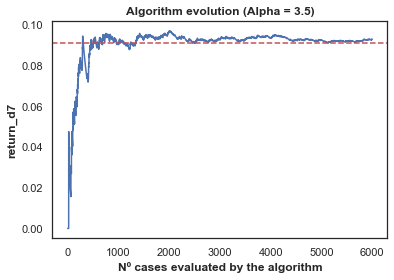

In [176]:
Plot_AlignRewards(Aligns_Best7_4, 0, Reward, Alpha, N = 6000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

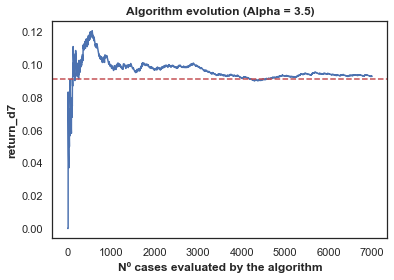

In [178]:
Plot_AlignRewards(Aligns_Best7_4, 2, Reward, Alpha, N = 7000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

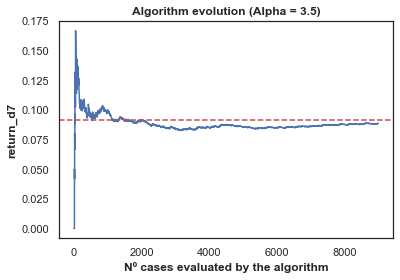

In [180]:
Plot_AlignRewards(Aligns_Best7_4, 3, Reward, Alpha, N = 9000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

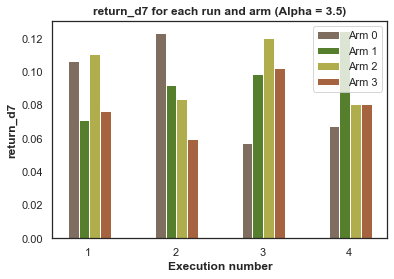

In [181]:
PerformanceArm4(Mean_RewardArms_Best7_4, Alpha, Reward)

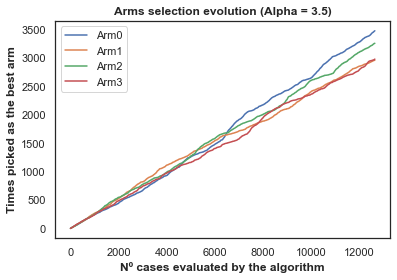

In [182]:
Plot_ArmsSelection(Paths_Best7_4, 0, Alpha)

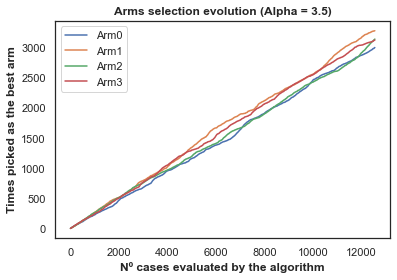

In [183]:
Plot_ArmsSelection(Paths_Best7_4, 2, Alpha)

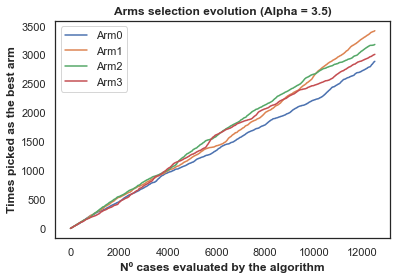

In [184]:
Plot_ArmsSelection(Paths_Best7_4, 3, Alpha)

Times each arm is chosen: [3088.25 3224.   3198.5  3062.  ]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 78.29259263828243
Proportion source_alias_source2 equals 0 for arm 1 is: 76.89693004445158
Proportion source_alias_source2 equals 0 for arm 2 is: 71.08308878499568
Proportion source_alias_source2 equals 0 for arm 3 is: 73.69309758995286


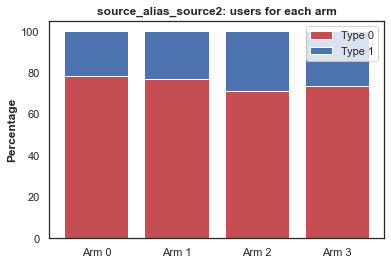

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 80.40206036894195
Proportion platform_alias_platform2 equals 0 for arm 1 is: 78.89790107220422
Proportion platform_alias_platform2 equals 0 for arm 2 is: 84.17011259326569
Proportion platform_alias_platform2 equals 0 for arm 3 is: 78.46727773207091


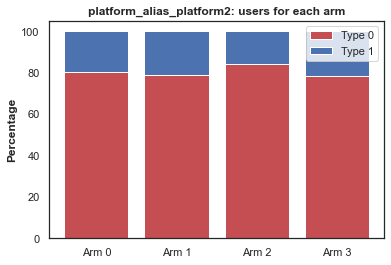

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.12196589 0.11158629 0.76644782]
Proportion country for arm 1 is: [0.12551063 0.14591715 0.72857222]
Proportion country for arm 2 is: [0.11189092 0.10292062 0.78518846]
Proportion country for arm 3 is: [0.1164351  0.11906428 0.76450063]


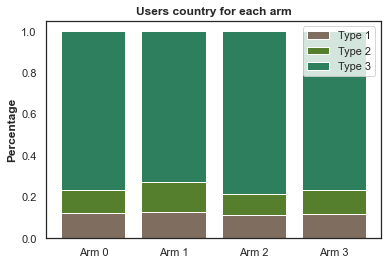

In [185]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4, Feat_Best7_4)

In [186]:
printFeatures2(Mark_Best7_4, Feat_Best7_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 87.80341084449316
Proportion country_alias_country_group1 equals 0 for arm 1 is: 87.44893708056374
Proportion country_alias_country_group1 equals 0 for arm 2 is: 88.81090771974223
Proportion country_alias_country_group1 equals 0 for arm 3 is: 88.35649017485353

Proportion country_alias_country_group2 equals 0 for arm 0 is: 88.8413709405545
Proportion country_alias_country_group2 equals 0 for arm 1 is: 85.40828497976332
Proportion country_alias_country_group2 equals 0 for arm 2 is: 89.70793800471967
Proportion country_alias_country_group2 equals 0 for arm 3 is: 88.09357246484095

Proportion country_alias_country_group3 equals 0 for arm 0 is: 23.35521821495235
Proportion country_alias_country_group3 equals 0 for arm 1 is: 27.142777939672946
Proportion country_alias_country_group3 equals 0 for arm 2 is: 21.4811542755381
Proportion country_alias_country_group3 equals 0 for arm 3 is: 23.54993736030553

Proportion platform_alias_

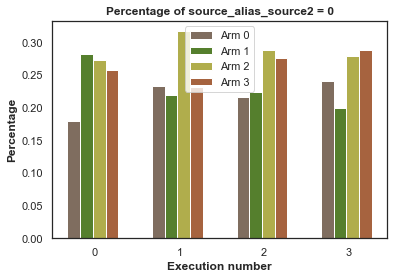

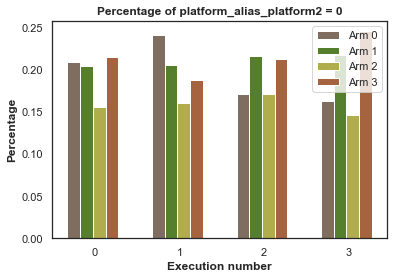

In [187]:
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "platform_alias_platform2")

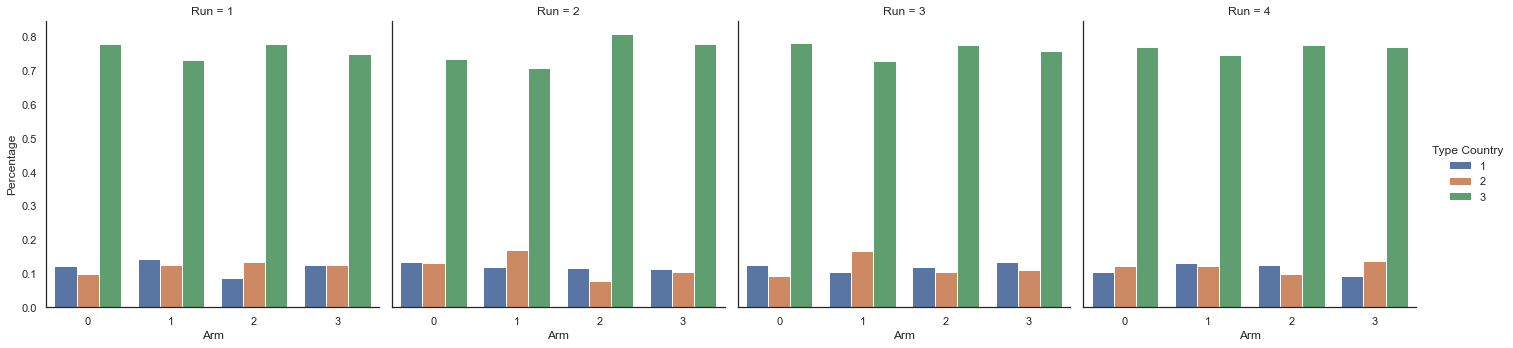

In [188]:
PlotFeaturesArm_4_Country4Runs(Feat_Best7_4)